<a href="https://colab.research.google.com/github/CHANDU0556/OCTAVE/blob/master/fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
dataframe=pd.read_csv('/content/drive/My Drive/docs/scan/csv_files/Fish_classification(KNN).csv')

In [0]:
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
dataframe.shape

(159, 7)

In [0]:
X=dataframe[['Weight','Length1','Length2','Length3','Height','Width']]
Y=dataframe['Species']

In [0]:
dataframe['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalar=StandardScaler()

In [0]:
scalar.fit(dataframe.drop('Species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_feature=scalar.transform(dataframe.drop('Species',axis=1))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_feature,dataframe['Species'],test_size=0.2)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
error_rate=[]

In [0]:
for i in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=i,leaf_size=10)
  knn.fit(X_test,Y_test)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=Y_test))


In [0]:
Y_test.shape,pred_i,error_rate

((32,), array(['Bream', 'Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
        'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream',
        'Perch', 'Perch', 'Roach', 'Bream', 'Perch', 'Roach', 'Perch',
        'Perch', 'Perch', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
        'Bream', 'Roach', 'Bream', 'Bream'], dtype=object), [0.0,
  0.15625,
  0.25,
  0.375,
  0.5,
  0.4375,
  0.46875,
  0.5,
  0.53125])

Text(0, 0.5, 'error_rate')

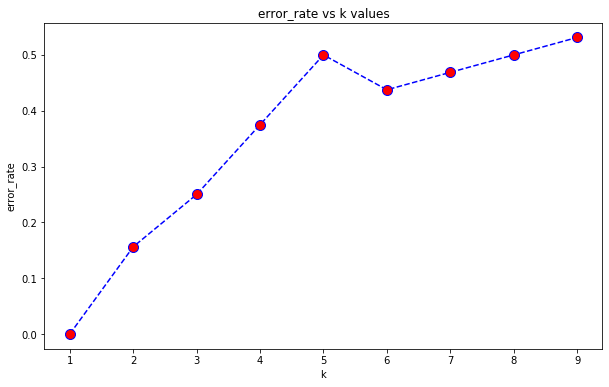

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error_rate vs k values')
plt.xlabel('k')
plt.ylabel('error_rate')

In [0]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy=accuracy_score(Y_test,pred)

In [0]:
accuracy

0.75